##import library


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# model building tools
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

##Data preprocessing

In [2]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/simple NLP projects/dataset/Launguage detection dataset 1/dataset.csv")
df1.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [3]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/simple NLP projects/dataset/Launguage detection dataset 1/singlish_dataset.csv",encoding='iso-8859-1')
df2.head()

,Text,language
0,Mama lankawe adu denuma gena adahas karanne ey...,Singlish
1,Ape rata bawa gama wenuwen prathipattiya jeewa...,Singlish
2,Api awashya deyak karaganna pulu wanama pasupa...,Singlish
3,Mama mage yaluwo langa hitapan katha karana de...,Singlish
4,Ayi aththatama samaharu lokaya gena nopenena d...,Singlish


In [4]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [5]:
df.language.value_counts()

,count
language,
Singlish,1069
Swedish,1000
Estonian,1000
Tamil,1000
Dutch,1000
Japanese,1000
Thai,1000
Turkish,1000
Latin,1000


In [6]:
# function to clean text
def clean_txt(text):
    text=str(text)
    text=text.lower()
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[_0-9]',' ',text)
    text=re.sub(r'\s\s+',' ',text)
    return text



# example
txt = 'my (&*(()))name %$#is harsh_priye 0.33'
print(clean_txt(txt))




my name is harsh priye 


In [7]:
x= [clean_txt(text) for text in df["Text"]]

In [8]:
print(x)

Output hidden; open in https://colab.research.google.com to view.

**Understanding TfidfVectorizer() in NLP**

TfidfVectorizer() is a feature extraction technique used in Natural Language Processing (NLP) to convert text data into numerical format. It transforms text into TF-IDF (Term Frequency-Inverse Document Frequency) vectors, which help represent the importance of words in a document

In [9]:
# using Tfidf Vectorizer:
tfidf = TfidfVectorizer()
tfidf.fit(x)
x_ready = tfidf.transform(x)

In [10]:
print(x_ready)
print(x_ready.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 920769 stored elements and shape (23071, 279726)>
  Coords	Values
  (0, 138)	0.08534342260604683
  (0, 155)	0.21581949652827362
  (0, 2227)	0.10046438424937465
  (0, 43913)	0.15235841138760806
  (0, 43914)	0.15235841138760806
  (0, 43915)	0.15235841138760806
  (0, 45868)	0.12270703816611646
  (0, 46391)	0.15235841138760806
  (0, 47635)	0.14639157470800845
  (0, 50118)	0.15235841138760806
  (0, 53804)	0.13298632351292594
  (0, 56027)	0.2678454280150625
  (0, 58654)	0.13887424952314162
  (0, 60145)	0.15235841138760806
  (0, 61886)	0.14639157470800845
  (0, 64069)	0.13392271400753125
  (0, 64398)	0.24351457471066285
  (0, 68663)	0.15235841138760806
  (0, 68664)	0.15235841138760806
  (0, 76389)	0.22922507958268387
  (0, 76448)	0.16677611083213173
  (0, 77882)	0.13887424952314162
  (0, 78817)	0.08209064919226004
  (0, 80533)	0.15235841138760806
  (0, 81294)	0.14639157470800845
  :	:
  (23067, 110696)	0.1638337419974697
  (23067, 

In [11]:
enc = LabelEncoder()
enc.fit( df["language"])
y_ready = enc.transform(df["language"])


In [12]:
print(y_ready)

[ 4 18 20 ... 16 23 23]


In [13]:
# storing encoded label hast list as 'labels'
labels = enc.classes_
# display first 10 labels:
print(labels[:])
print(len(labels))

['Arabic' 'Chinese' 'Dutch' 'English' 'Estonian' 'French' 'Hindi'
 'Indonesian' 'Japanese' 'Korean' 'Latin' 'Persian' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Singlish' 'Spanish' 'Swedish' 'Tamil' 'Thai'
 'Turkish' 'Urdu' nan]
24


##Training model

In [14]:
# train test split:
x_train, x_test, y_train, y_test = train_test_split(x_ready,y_ready,
                                                    test_size=0.1, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20763, 279726), (20763,), (2308, 279726), (2308,))

MultinomialNB() is a Naïve Bayes classifier specifically designed for text classification and discrete count data. It is commonly used for Natural Language Processing (NLP) tasks such as spam detection, sentiment analysis, and topic classification.

In [15]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [16]:
nb_score = nb.score(x_test,y_test)
print(nb_score)

0.932842287694974


In [17]:
# use pipeline to combine prefitted vectorizer and trained model into one object
model = Pipeline([('vectorizer',tfidf),('nb',nb)])

In [18]:
# save the model:
pickle.dump(model,open('Language_detection_model_v1.pkl','wb'))
# save the encoder
pickle.dump(enc,open('Language_encoder.pkl','wb'))

##Model evaluation

In [19]:
predict_Y=nb.predict(x_test)
print(predict_Y)

[ 8 11 21 ...  0 22 21]


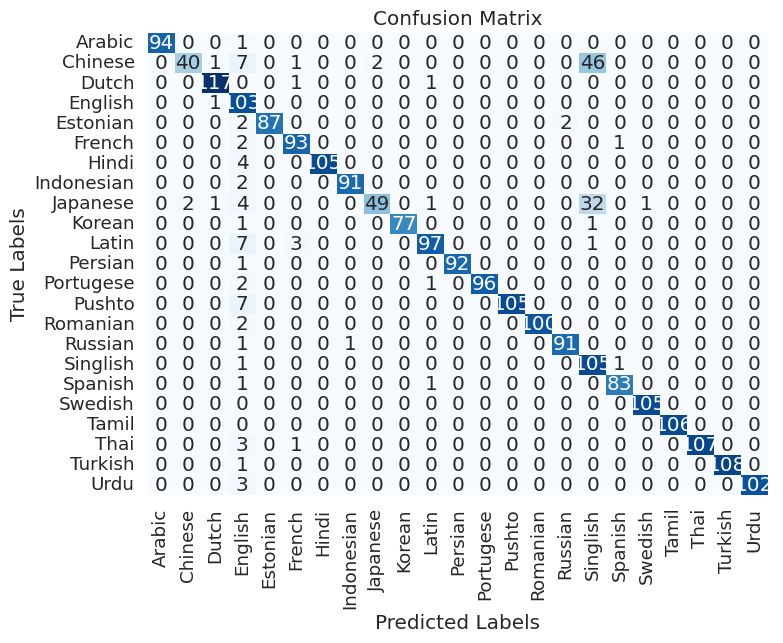

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test,predict_Y)

# Define class labels if available
class_labels = ['Arabic', 'Chinese' ,'Dutch' ,'English', 'Estonian', 'French', 'Hindi',
 'Indonesian' ,'Japanese', 'Korean' ,'Latin' ,'Persian' ,'Portugese' ,'Pushto',
 'Romanian' ,'Russian','Singlish' ,'Spanish', 'Swedish' ,'Tamil' ,'Thai' ,'Turkish', 'Urdu']  # Replace with your class labels if available

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [21]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and predict_Y contains the predicted labels
report = classification_report(y_test,predict_Y)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.95      0.41      0.58        97
           2       0.97      0.98      0.98       119
           3       0.66      0.99      0.80       104
           4       1.00      0.96      0.98        91
           5       0.94      0.97      0.95        96
           6       1.00      0.96      0.98       109
           7       0.99      0.98      0.98        93
           8       0.96      0.54      0.70        90
           9       1.00      0.97      0.99        79
          10       0.96      0.90      0.93       108
          11       1.00      0.99      0.99        93
          12       1.00      0.97      0.98        99
          13       1.00      0.94      0.97       112
          14       1.00      0.98      0.99       102
          15       0.98      0.98      0.98        93
          16       0.57      0.98      0.72       107
    

##Predictions

In [22]:
with open('/content/Language_detection_model_v1.pkl', 'rb') as file:
    model_language = pickle.load(file)

with open('/content/Language_encoder.pkl', 'rb') as file:
    encode_language = pickle.load(file)

def predict(text):
    pred =model_language.predict([clean_txt(text)])
    ans = encode_language.inverse_transform(pred)
    return ans[0]

In [23]:
predict('my name is harsh'), predict('मेरा नाम हर्ष हे'), predict('mi nombre es harsh'), predict('меня зовут Харш'), predict('mon nom est harsh'),predict("シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に."),predict("de spons behoort tot het geslacht haliclona en.")

('English', 'Hindi', 'Spanish', 'Russian', 'French', 'Japanese', 'Dutch')

In [24]:
predict('ape amma mal wawanna asai,office mail ekata damma massage akak, gedara giihin balala, uththarayak denna'),predict('mama job aka karanne gedara edan')

('Singlish', 'Singlish')